Network of Actors and Movies

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
file_path = 'data/actors_movies.csv'
df = pd.read_csv(file_path)
df.head()

,actor,movie_title
0,Logan Lerman,Percy Jackson & the Olympians: The Lightning T...
1,Brandon T. Jackson,Percy Jackson & the Olympians: The Lightning T...
2,Alexandra Daddario,Percy Jackson & the Olympians: The Lightning T...
3,Jake Abel,Percy Jackson & the Olympians: The Lightning T...
4,Sean Bean,Percy Jackson & the Olympians: The Lightning T...


In [4]:
df.columns

Index(['actor', 'movie_title'], dtype='object')

In [5]:
df['count_actors'] = df.groupby('movie_title').actor.transform('count')

In [6]:
df.head()

,actor,movie_title,count_actors
0,Logan Lerman,Percy Jackson & the Olympians: The Lightning T...,87
1,Brandon T. Jackson,Percy Jackson & the Olympians: The Lightning T...,87
2,Alexandra Daddario,Percy Jackson & the Olympians: The Lightning T...,87
3,Jake Abel,Percy Jackson & the Olympians: The Lightning T...,87
4,Sean Bean,Percy Jackson & the Olympians: The Lightning T...,87


In [7]:
df.loc[df["actor"] == "Sean Bean"]

,actor,movie_title,count_actors
29796,Sean Bean,Black Beauty,31
47901,Sean Bean,The Dark,11
51257,Sean Bean,Far North,3
66743,Sean Bean,Age of Heroes,11
96244,Sean Bean,Black Death,12
121133,Sean Bean,Cleanskin,7
148556,Sean Bean,Drone,6
155828,Sean Bean,Essex Boys,15
197584,Sean Bean,The Hitcher,23
288804,Sean Bean,Outlaw,53


In [8]:
df_count_actors = df.groupby('actor').apply(lambda x: x['count_actors'].sum() - x['count_actors'].count())
df_count_actors

actor
 "Biff" Henderson             45
 "Big" Sam Holloway           52
 "Black Scorpion" Sayavong    39
 "Chicken" Holleman           14
 "Crazy Steve" Olsen          62
                              ..
Zsa Zsa Gabor                 18
Zsófia Psotta                  9
Ákos Ambrus                    2
Álvaro Ogalla                 18
Émile Genest                  15
Length: 209865, dtype: int64

In [9]:
df_filtered = df_count_actors[df_count_actors >= 1200]

df_filtered

actor
 Adam LeFevre         1952
 Adrian Martinez      1215
 Afemo Omilami        1561
 Aidan Quinn          1283
 Al Bridge            1403
                      ... 
Sean Connery          1234
Steve Martin          1284
Sylvester Stallone    1392
Tom Cruise            1915
Tom Hanks             1754
Length: 550, dtype: int64

In [10]:
df_filtered = df_filtered.reset_index()
df_filtered.columns = ['actor', 'count_of_actors_work_with']
df_filtered

,actor,count_of_actors_work_with
0,Adam LeFevre,1952
1,Adrian Martinez,1215
2,Afemo Omilami,1561
3,Aidan Quinn,1283
4,Al Bridge,1403
...,...,...
545,Sean Connery,1234
546,Steve Martin,1284
547,Sylvester Stallone,1392
548,Tom Cruise,1915


In [11]:
df_actors_movies = df.groupby('actor')['movie_title'].apply(list).reset_index()

df_final = pd.merge(df_filtered, df_actors_movies, on='actor')

df_final.columns = ['actor', 'count_of_actors_work_with', 'movies']

print(df_final.head())

              actor  count_of_actors_work_with  \
0      Adam LeFevre                       1952   
1   Adrian Martinez                       1215   
2     Afemo Omilami                       1561   
3       Aidan Quinn                       1283   
4         Al Bridge                       1403   

                                              movies  
0  [Arthur and the Invisibles (Arthur and the Min...  
1  [A Perfect Murder, The Taking of Pelham 1 2 3,...  
2  [Glory, The Long Walk Home, The Firm, Hounddog...  
3  [Wild Child, The Mission, Stakeout, Avalon, Ni...  
4  [A Night at the Opera, Unfaithfully Yours, The...  


In [12]:
G = nx.Graph()

for _, row in df_final.iterrows():
    actor = row['actor']
    movies = row['movies']
    for movie in movies:
        G.add_edge(actor, movie)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 8695
Number of edges: 20295


In [13]:
nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)

selected_nodes = set()
for node, degree in nodes_by_degree:
    if len(selected_nodes) >= 630:
        break
    selected_nodes.add(node)

subgraph = G.subgraph(selected_nodes)

num_nodes_subgraph = subgraph.number_of_nodes()
num_edges_subgraph = subgraph.number_of_edges()

num_nodes_subgraph, num_edges_subgraph

(630, 953)

In [14]:
nodes = list(subgraph.nodes(data=True))
edges = list(subgraph.edges(data=True))

df_nodes = pd.DataFrame(nodes, columns=['node', 'attr'])
df_edges = pd.DataFrame(edges, columns=['source', 'target', 'attr'])

df_nodes.to_csv('actor_movie_nodes_630.csv', index=False)
df_edges.to_csv('actor_movie_edges_630.csv', index=False)

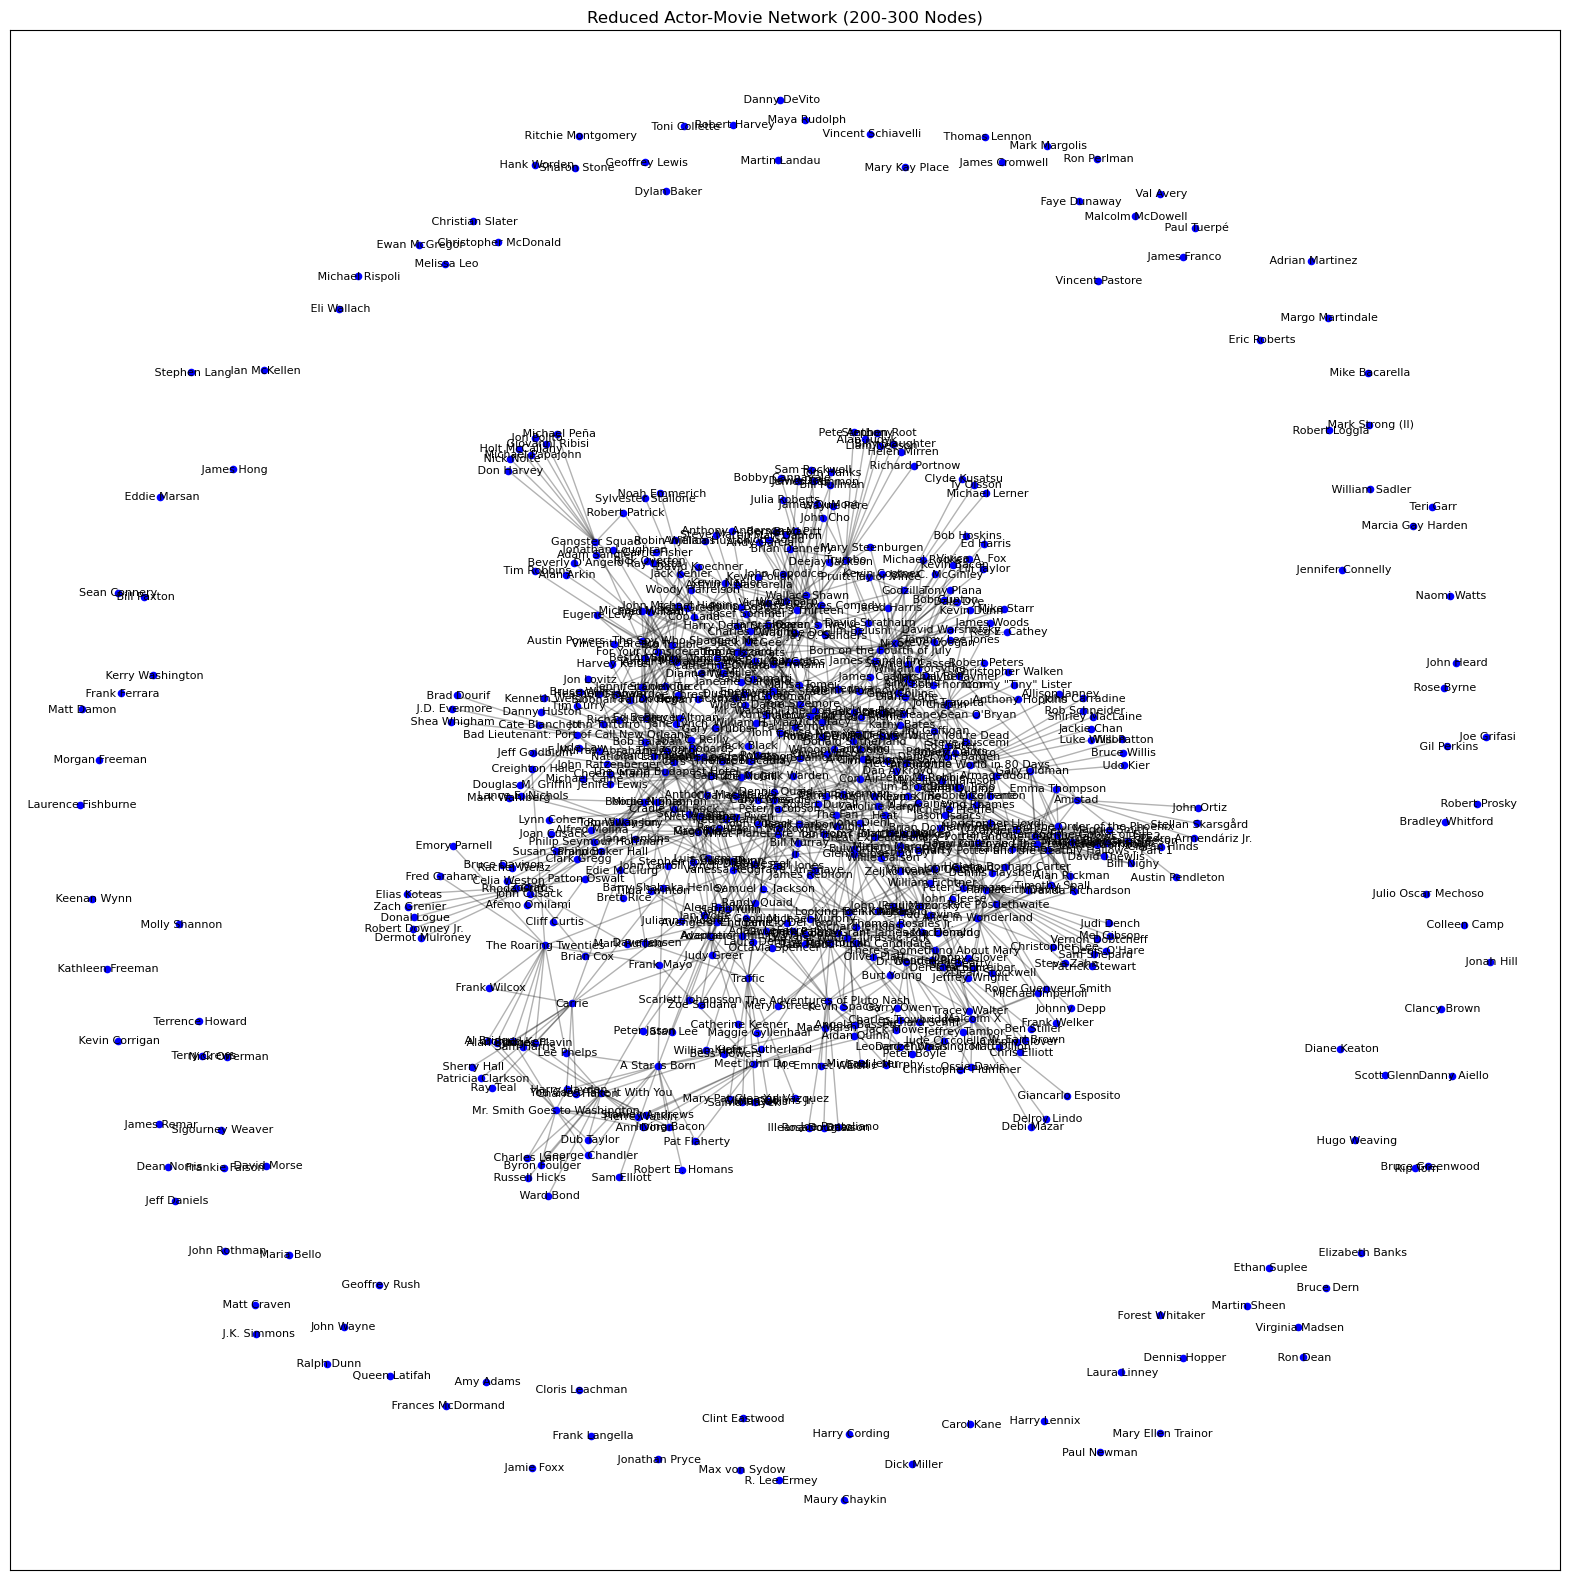

In [15]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(subgraph, k=0.1)  # positions for all nodes

nx.draw_networkx_nodes(subgraph, pos, node_size=20, node_color='blue')
nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
nx.draw_networkx_labels(subgraph, pos, font_size=8, font_family="sans-serif")

plt.title("Reduced Actor-Movie Network (200-300 Nodes)")
plt.show()

In [24]:
edges_path = 'data/actor_movie_edges_630.csv'
nodes_path = 'data/actor_movie_nodes_630.csv'

edges_df = pd.read_csv(edges_path)
nodes_df = pd.read_csv(nodes_path)

edges_df.head(), nodes_df.head()

(         source                                         target attr
 0   Gary Oldman                                            JFK   {}
 1   Gary Oldman  Harry Potter and the Deathly Hallows - Part 2   {}
 2   Gary Oldman            Harry Potter and the Goblet of Fire   {}
 3   Gary Oldman      Harry Potter and the Order of the Phoenix   {}
 4   Gary Oldman       Harry Potter and the Prisoner of Azkaban   {},
              node attr
 0     Gary Oldman   {}
 1   Wallace Shawn   {}
 2       The Paper   {}
 3  A Time to Kill   {}
 4     Melissa Leo   {})

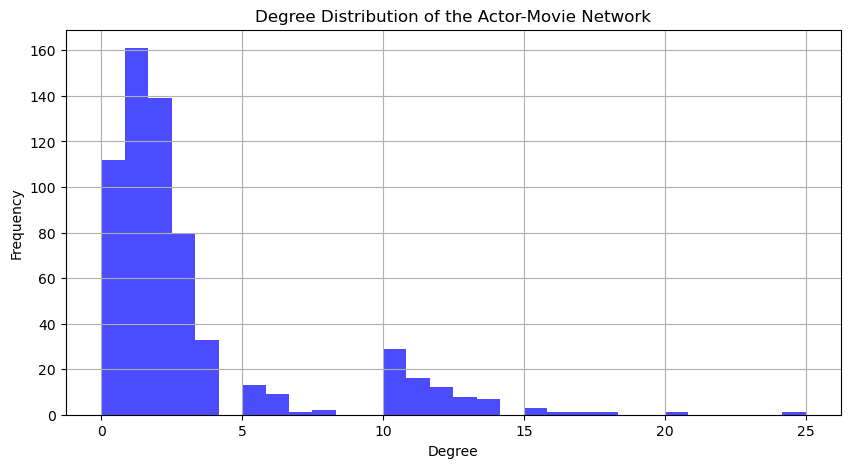

In [25]:
G = nx.Graph()

G.add_nodes_from(nodes_df['node'])
G.add_edges_from(edges_df.apply(lambda x: (x['source'], x['target']), axis=1))

degrees = [degree for node, degree in G.degree()]

plt.figure(figsize=(10, 5))
plt.hist(degrees, bins=30, color='blue', alpha=0.7)
plt.title('Degree Distribution of the Actor-Movie Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


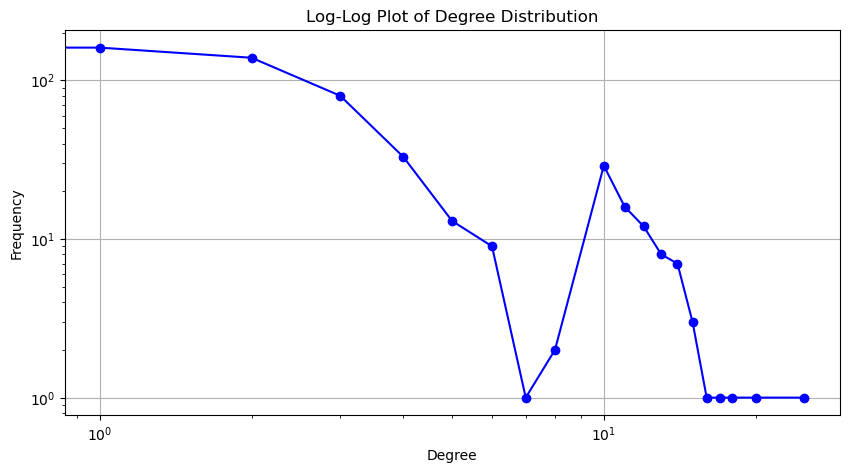

In [26]:
degree_counts = np.bincount(degrees)
non_zero_degrees = np.arange(len(degree_counts))[degree_counts > 0]
non_zero_counts = degree_counts[degree_counts > 0]

plt.figure(figsize=(10, 5))
plt.loglog(non_zero_degrees, non_zero_counts, 'bo-')
plt.title('Log-Log Plot of Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
num_components = nx.number_connected_components(G)

avg_clustering_coeff = nx.average_clustering(G)

num_nodes = len(G.nodes())
num_edges = len(G.edges())
p = num_edges / (num_nodes * (num_nodes - 1) / 2)
G_er = nx.gnp_random_graph(num_nodes, p)

degree_sequence = [degree for node, degree in G.degree()]
G_cm = nx.configuration_model(degree_sequence)
G_cm = nx.Graph(G_cm)
G_cm.remove_edges_from(nx.selfloop_edges(G_cm))

num_components_er = nx.number_connected_components(G_er)
avg_clustering_coeff_er = nx.average_clustering(G_er)
num_components_cm = nx.number_connected_components(G_cm)
avg_clustering_coeff_cm = nx.average_clustering(G_cm)

(num_components, num_components_er, num_components_cm), \
(avg_clustering_coeff, avg_clustering_coeff_er, avg_clustering_coeff_cm)

((113, 43, 122), (0.0, 0.00564625850340136, 0.013725480519111018))

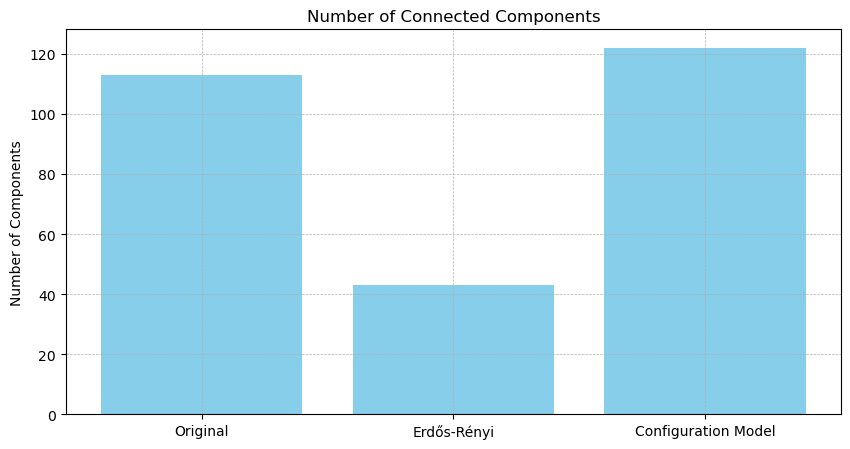

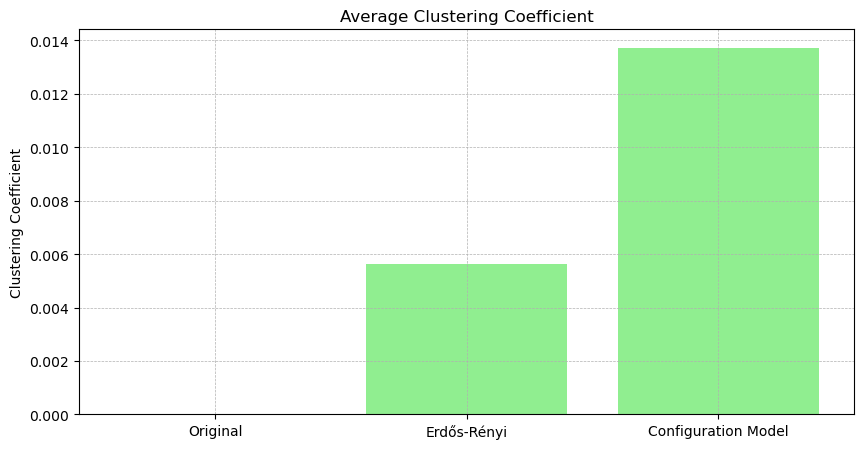

In [30]:
components = {
    'Original': nx.number_connected_components(G),
    'Erdős-Rényi': nx.number_connected_components(G_er),
    'Configuration Model': nx.number_connected_components(G_cm)
}
clustering = {
    'Original': nx.average_clustering(G),
    'Erdős-Rényi': nx.average_clustering(G_er),
    'Configuration Model': nx.average_clustering(G_cm)
}

plt.figure(figsize=(10, 5))
plt.bar(components.keys(), components.values(), color='skyblue')
plt.title('Number of Connected Components')
plt.ylabel('Number of Components')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(clustering.keys(), clustering.values(), color='lightgreen')
plt.title('Average Clustering Coefficient')
plt.ylabel('Clustering Coefficient')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [32]:
average_degree_original = np.mean([degree for node, degree in G.degree()])
average_degree_er = np.mean([degree for node, degree in G_er.degree()])
average_degree_cm = np.mean([degree for node, degree in G_cm.degree()])

data = {
    'Network Type': ['Original', 'Erdős-Rényi', 'Configuration Model'],
    'Average Degree': [average_degree_original, average_degree_er, average_degree_cm]
}

degree_df = pd.DataFrame(data)

degree_df


,Network Type,Average Degree
0,Original,3.025397
1,Erdős-Rényi,2.885714
2,Configuration Model,2.977778


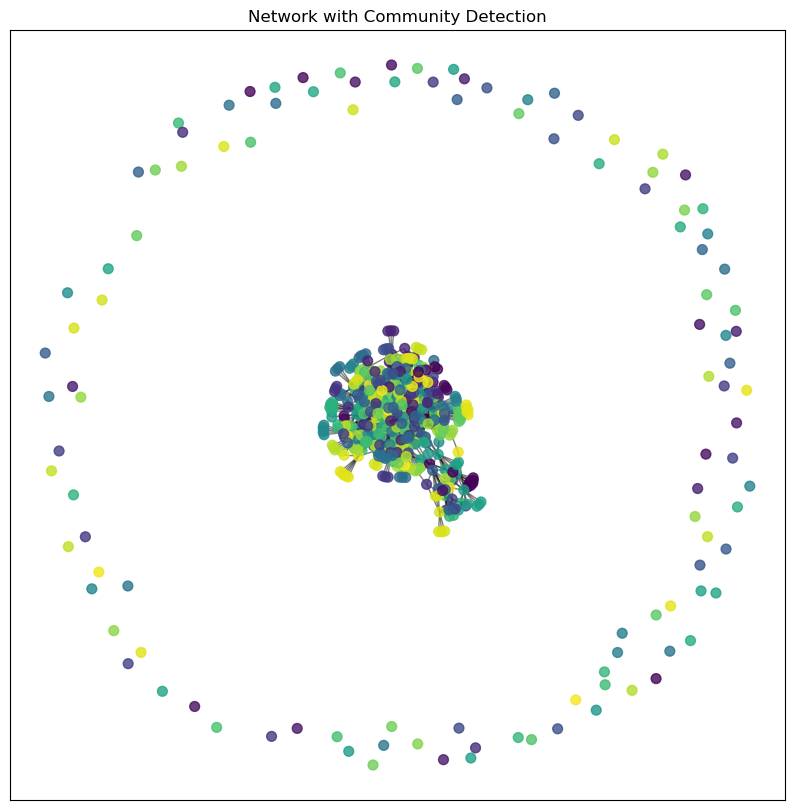

Modularity of the partition: 0.32986625325227953


NameError: name 'actor_movie_edges' is not defined

In [33]:
resolution = 50
partition = community_louvain.best_partition(G, resolution=resolution)

pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')
colors = [cmap(partition[node] / max(partition.values())) for node in G.nodes()]

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=50, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Network with Community Detection")
plt.show()

modularity = community_louvain.modularity(partition, G)
print(f"Modularity of the partition: {modularity}")

if 'metadata' in actor_movie_edges.columns:
    actor_movie_edges['community'] = actor_movie_edges['node'].map(partition)
    metadata_comparison = actor_movie_edges.groupby(['metadata', 'community']).size().unstack(fill_value=0)
    print(metadata_comparison)

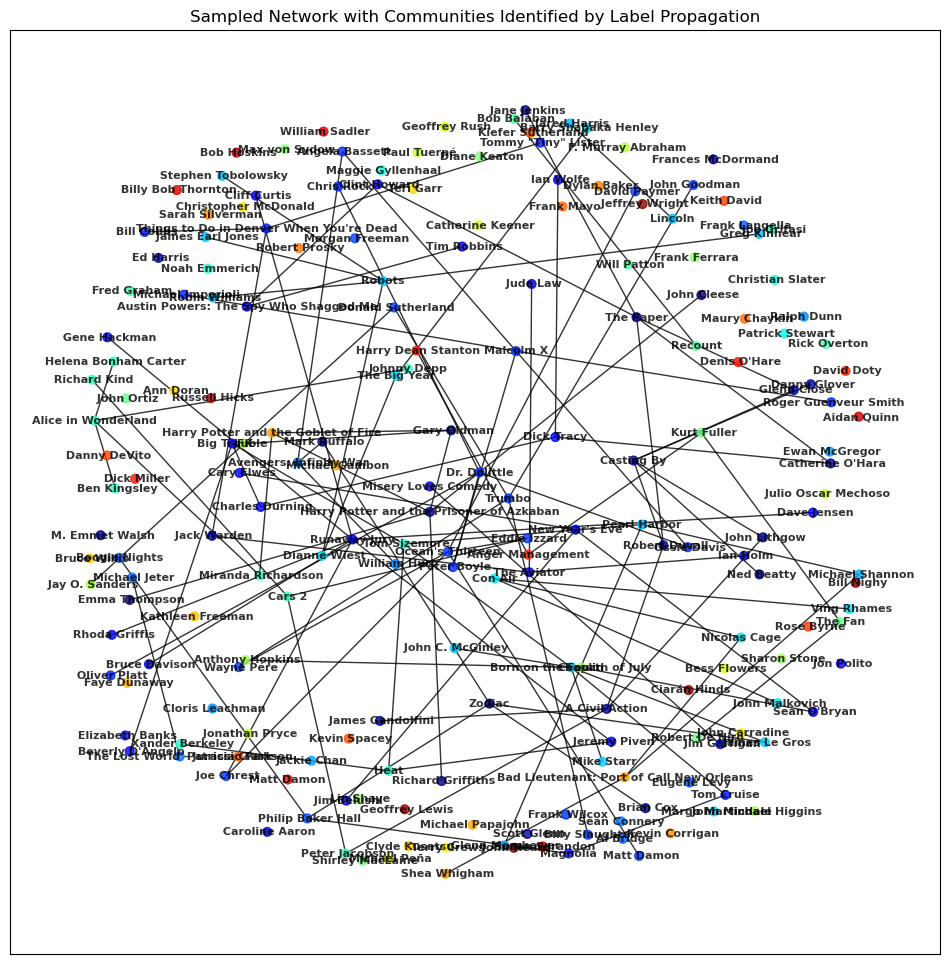

In [38]:
from networkx.algorithms.community import label_propagation_communities

def sample_subgraph(G, num_nodes):
    sampled_nodes = random.sample(list(G.nodes()), num_nodes)
    subgraph = G.subgraph(sampled_nodes)
    return subgraph

sampled_graph = sample_subgraph(G, 200)

sampled_communities = label_propagation_communities(sampled_graph)
sampled_community_data = {node: idx for idx, com in enumerate(sampled_communities) for node in com}

for node in sampled_graph.nodes():
    sampled_graph.nodes[node]['community'] = sampled_community_data[node]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(sampled_graph, k=0.3, iterations=20)
community_colors = [sampled_graph.nodes[node]['community'] for node in sampled_graph.nodes()]

nx.draw_networkx(sampled_graph, pos, node_color=community_colors, node_size=40, cmap=plt.cm.jet, alpha=0.8, with_labels=True, font_weight='bold', font_size=8)
plt.title('Sampled Network with Communities Identified by Label Propagation')
plt.show()